In [1]:
#importing required libraries 
import datetime


import pandas as pd 
import numpy as np 

from  scipy import stats

# data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns


#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression

print('Import done')

Import done


In [2]:
# path to the data file 
source_path = '/Users/chaarvi/Desktop/hf_assessment/PIO Analytics Test.xlsx'
sheet_name = 'D - boxes_data'

In [3]:
df = pd.read_excel(source_path, sheet_name = sheet_name)
df

,box_id,customer_id,country,week,box_type,recipe_selection,box _revenue,surcharge_revenue
0,AU751442860,A24603960,AU,2020-W19,A-2,10-1---,40,5
1,AU186149424,A82226650,AU,2020-W19,A-2,7-8---,40,5
2,AU245131466,A49893349,AU,2020-W19,A-2,1-5---,40,0
3,AU627026759,A33824461,AU,2020-W19,A-2,5-3---,40,0
4,AU399815143,A34149774,AU,2020-W19,A-2,6-6---,40,0
...,...,...,...,...,...,...,...,...
192,AU980767789,B51523960,AU,2020-W20,A-4,11-7-10-9-,60,10
193,AU39138885,C60953375,AU,2020-W20,A-2,9-18---,42,5
194,AU893812444,C38663312,AU,2020-W20,A-3,7-6-6--,51,0
195,AU767778501,C80460563,AU,2020-W20,A-4,8-12-13-7-,60,5


In [4]:
# Making a total revenue column by adding box_revenue and surcharge
df['total_box_revenue'] = df['box _revenue']  + df['surcharge_revenue']
df

,box_id,customer_id,country,week,box_type,recipe_selection,box _revenue,surcharge_revenue,total_box_revenue
0,AU751442860,A24603960,AU,2020-W19,A-2,10-1---,40,5,45
1,AU186149424,A82226650,AU,2020-W19,A-2,7-8---,40,5,45
2,AU245131466,A49893349,AU,2020-W19,A-2,1-5---,40,0,40
3,AU627026759,A33824461,AU,2020-W19,A-2,5-3---,40,0,40
4,AU399815143,A34149774,AU,2020-W19,A-2,6-6---,40,0,40
...,...,...,...,...,...,...,...,...,...
192,AU980767789,B51523960,AU,2020-W20,A-4,11-7-10-9-,60,10,70
193,AU39138885,C60953375,AU,2020-W20,A-2,9-18---,42,5,47
194,AU893812444,C38663312,AU,2020-W20,A-3,7-6-6--,51,0,51
195,AU767778501,C80460563,AU,2020-W20,A-4,8-12-13-7-,60,5,65


In [64]:
# Total number of orders in each week
df.groupby('week')['box_id'].count().reset_index()

,week,box_id
0,2020-W19,105
1,2020-W20,92


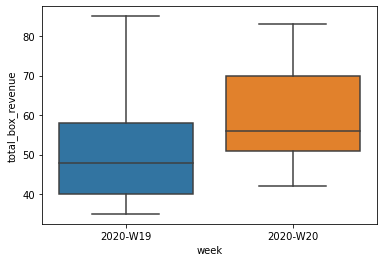

In [66]:
# Anlsysing the total revenue after the menu merge 
sns.boxplot(x='week',  y= 'total_box_revenue', data=df)
plt.show()

What can be observed from the 2 cells that although the number of orders have decreased in week 20 but the total revenue is greater than the previous week 

In [56]:
df.groupby('week').mean()

,box _revenue,surcharge_revenue,total_box_revenue
week,,,
2020-W19,47.971429,2.666667,50.638095
2020-W20,55.228261,4.076087,59.304348


## Part-1 Anlaysing Impact of price change

In this analysis the aim is to find out if there was an increase in the order of special recepies after the price change. The recpeies which have a surcharge value > 0 were categorised as special recepies


From the above table it can seems like the number of special recepie orders changed after the price change. 



In order to explain this change in the mean, whether this happened by chance due to the choice of sample size or if menu merge had any impact on the increase in the number of special recepies order, I would use **t-test** to test a null hypothesis and an alternate hypothesis 

**H0**: The price change has no effect of the number of special recepies and the change in  mean of surcharge is possibily due to the sampling effect


**H1**:The price change has  effect of the number of special recepies. 

In [44]:
# importing stats model  from scipy library 
from scipy import stats

In [58]:
#setting the critical value
critical_value=0.05

cat1 = df[df['week']=='2020-W19']
cat2 = df[df['week']=='2020-W20']

In [61]:
tStat, pValue =  stats.ttest_ind(cat1['surcharge_revenue'], cat2['surcharge_revenue'], equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.015288782873601624 T-Statistic:-2.4477647650906973


## Part-1 Result

As observed from the t-test above the p-value returned i.e. 0.015 is less than the chosen critical value, hence the null hypotheisis can be rejected here and it can be concluded that post the menu merge, more number of specialised recepies were ordered which explains the increase in the overall revenue for the week-20 despite the less number of orders.   

## Part-2 Anlaysing Impact of menu merge

In this anlaysis I would anlayse the impact of of menu merge on the ordering behaviour of customers

In [97]:
# grouping the dataset based on customer ids
df_customer = df.groupby('customer_id')['box_type'].apply(list).reset_index()


In [98]:
# Checking for the number of orders of each cutomer over the week 
df_customer['num_boxes'] = df_customer['box_type'].str.len()
df_customer

,customer_id,box_type,num_boxes
0,A11140426,"[A-2, A-3]",2
1,A12080653,[A-2],1
2,A15609136,"[A-4, A-5]",2
3,A16539583,"[A-2, A-3]",2
4,A16677024,"[A-3, A-4]",2
...,...,...,...
100,C79869778,[C-4],1
101,C80432525,"[C-5, A-5]",2
102,C80460563,"[C-3, A-4]",2
103,C92376519,[C-4],1


In [140]:
# if the number of orders are less than 2 then we categorise a cutomer as 'not-changed' else 'changed'
df_customer['changed_boxes'] = df_customer.apply(lambda x:'changed'if x.num_boxes >1 else 'not changed', axis=1)
df_customer


,customer_id,box_type,num_boxes,changed_boxes
0,A11140426,"[A-2, A-3]",2,changed
1,A12080653,[A-2],1,not changed
2,A15609136,"[A-4, A-5]",2,changed
3,A16539583,"[A-2, A-3]",2,changed
4,A16677024,"[A-3, A-4]",2,changed
...,...,...,...,...
100,C79869778,[C-4],1,not changed
101,C80432525,"[C-5, A-5]",2,changed
102,C80460563,"[C-3, A-4]",2,changed
103,C92376519,[C-4],1,not changed


In [141]:
# Getting the count of coustomers who changed their plans from week 19 to week 20 
df_customer_grp= df_customer.groupby('changed_boxes')['customer_id'].count().reset_index()
df_customer_grp.rename(columns={'customer_id': 'count'}, inplace=True)

<AxesSubplot:xlabel='changed_boxes', ylabel='count'>

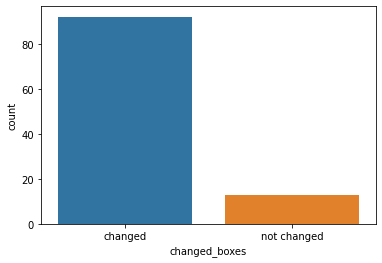

In [142]:
# visualising the dataset
sns.barplot(y='count', x='changed_boxes', data= df_customer_grp)

From the graph it can be observed that a majority of customers changed their plans after the merginf of the menus

### In this sections I analyse the impact on the revenue for each category of boxes over the period of two weeks

In [133]:
# getting the sum of revenues grouped by box_type, week
df_customer_price = df.groupby(['box_type','week'])['total_box_revenue'].sum().reset_index()

In [157]:
# calculating the difference in revenue for each box-type in comparison to the previous week
revenue_change = df_customer_price.groupby('box_type')['total_box_revenue'].diff()
revenue_change

0        NaN
1     -373.0
2        NaN
3      744.0
4        NaN
5      490.0
6        NaN
7     1405.0
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
Name: total_box_revenue, dtype: float64

In [158]:
df_customer_price['revenue_change'] = revenue_change
df_customer_price['revenue_change'].fillna(0, inplace=True)
df_customer_price

,box_type,week,total_box_revenue,revenue_change
0,A-2,2020-W19,1290,0.0
1,A-2,2020-W20,917,-373.0
2,A-3,2020-W19,820,0.0
3,A-3,2020-W20,1564,744.0
4,A-4,2020-W19,610,0.0
5,A-4,2020-W20,1100,490.0
6,A-5,2020-W19,470,0.0
7,A-5,2020-W20,1875,1405.0
8,B-2,2020-W19,456,0.0
9,B-3,2020-W19,432,0.0


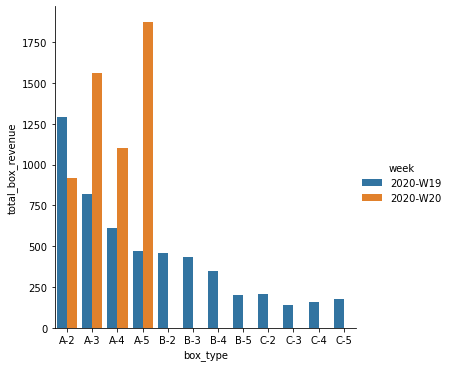

In [160]:
#Visulaising the dataset 
sns.catplot(x="box_type", y="total_box_revenue", hue="week", kind="bar", data=df_customer_price)

## Result-Part 2

1. From this graph it can be deduced that the box-type 'A-5' witnessed the highest jump in the revenue which means many customers changed their plan to 'A-5' along with 'A-3' and 'A-4' as soon as the menus were merged. 


2. This makes the 'A-5', 'A-3' and 'A-4'  popular categories and can be recommended to the novel users and hence more revenue can be generated from these categories. 


3. 'A-2' witnessed a severe drop in the revenue from week19. 


4. However, to find the cause for both events will require further investigation. 